# Download the spleen dataset

In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/Projects/Project3DSpleen.zip -d /content

In [2]:
!gdown --id 1wEB2I6S6tQBVEPxir8cA5kFB8gTQadYY

Downloading...
From: https://drive.google.com/uc?id=1wEB2I6S6tQBVEPxir8cA5kFB8gTQadYY
To: /content/Task02_Heart.tar
456MB [00:05, 81.0MB/s]


# untar it 

In [ ]:
!tar -xvf /content/Task02_Heart.tar

# EXPLORATORY DATA ANALYSIS OF THE SPLEEN DATASET

# Preparing the dataset for spleen segmentation

In [5]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
import os
import shutil
import scipy.ndimage as nd

# Loading NIFTI images using NiBabel
NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - images and labels. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [7]:
# TASK: Your data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label
images = glob("/content/Task02_Heart/imagesTr/*.nii.gz")
labels = glob("/content/Task02_Heart/labelsTr/*.nii.gz")
print(f"#images: {len(images)} and #labels: {len(labels)}")
print(images[2], labels[2])
image = nib.load(images[2])
label = nib.load(labels[2])

#images: 20 and #labels: 20
/content/Task02_Heart/imagesTr/la_021.nii.gz /content/Task02_Heart/labelsTr/la_021.nii.gz


# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
#### The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
#### In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
#### by accessing the .shape attribute. What are the dimensions of the input arrays?

In [8]:
!pip install SimpleITK 

     |████████████████████████████████| 47.4MB 64kB/s 


[0. 1.]
image_data.shape: (320, 320, 100), label_data.shape: (320, 320, 100)


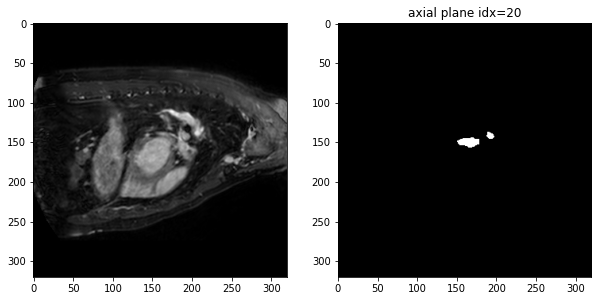

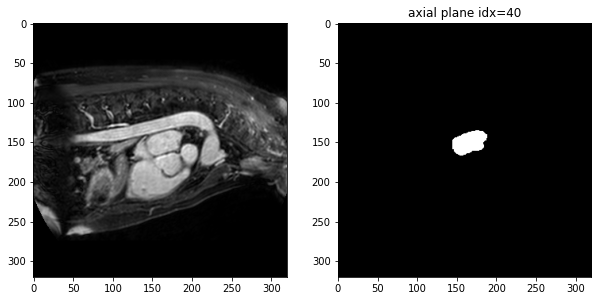

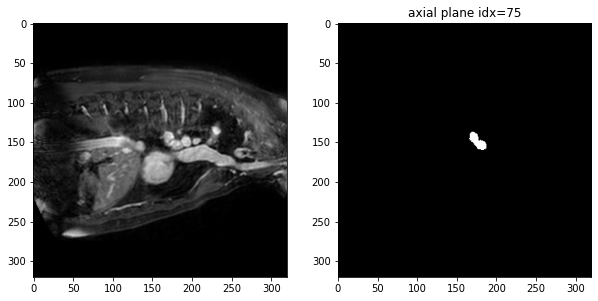

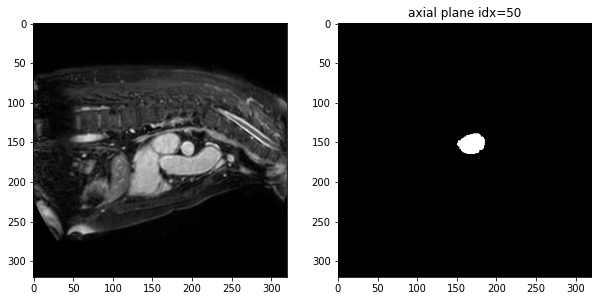

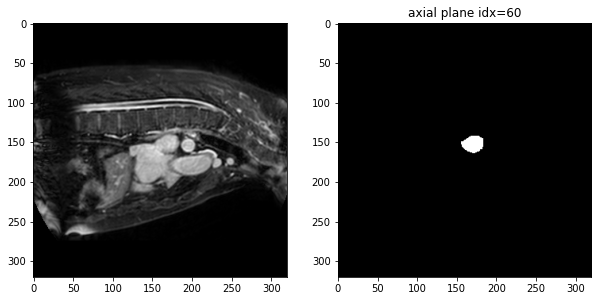

In [73]:


# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels. 
# You can adjust plot sizes like so if you find them too small:
plt.rcParams["figure.figsize"] = (10,10)

image_data = image.get_fdata()
label_data = label.get_fdata()
print(np.unique(label_data))




print(f"image_data.shape: {image_data.shape}, label_data.shape: {label_data.shape}")

def plot_img(idx):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_data[:,:,idx], cmap='gray')

    plt.subplot(1,2,2)
    plt.imshow(label_data[:,:,idx]*500, cmap='gray')
    plt.title(f"axial plane idx={idx}")
    plt.show()

plot_img(20)
plot_img(40)
plot_img(75)
plot_img(50)
plot_img(60)

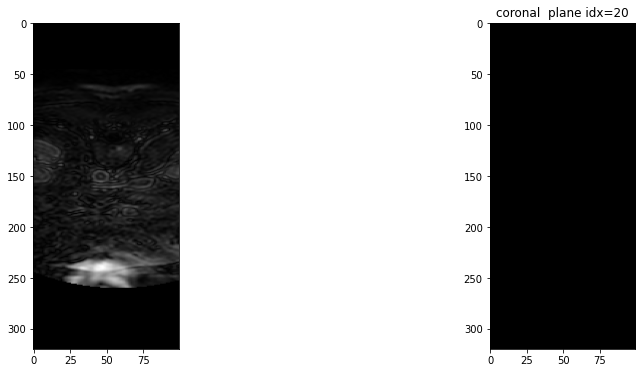

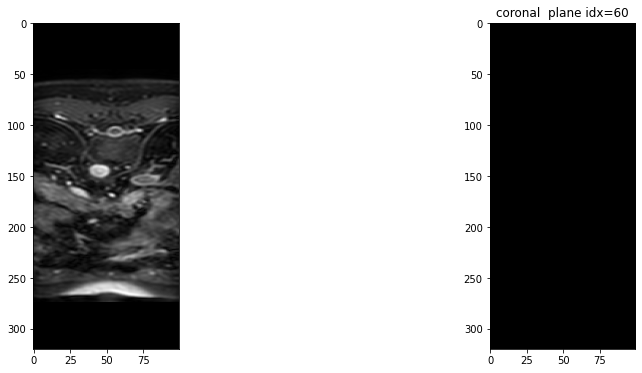

In [28]:
def plot_img(idx):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.imshow(image_data[:,idx,:], cmap='gray',aspect=.7)

    plt.subplot(1,2,2)
    plt.imshow(label_data[:,idx,:]*500, cmap='gray', aspect=.7)
    plt.title(f"coronal  plane idx={idx}")
    plt.show()

plot_img(20)
plot_img(60)


(320, 320, 100)


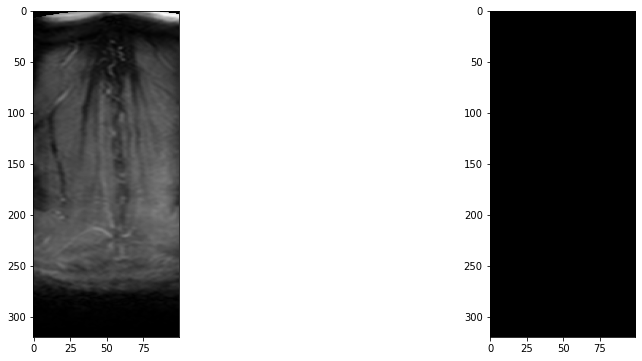

(320, 320, 100)


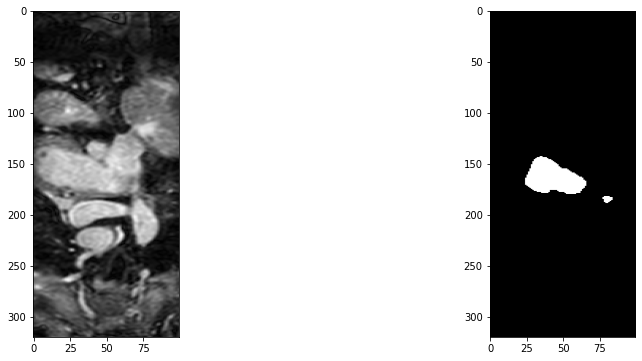

In [44]:
def plot_img(idx):
    plt.figure(figsize=(15,6))
    plt.title(f"sagitall  plane idx={idx}")
    plt.subplot(1,2,1)
    print(image_data.shape)
    plt.imshow(image_data[idx,:,:], cmap='gray',aspect=.7)

    plt.subplot(1,2,2)
    plt.imshow(label_data[idx,:,:], cmap='gray', aspect=0.7)
    plt.show()

plot_img(76)
plot_img(160)


# image processing using maximum intensity projection to visulaize any outliers.

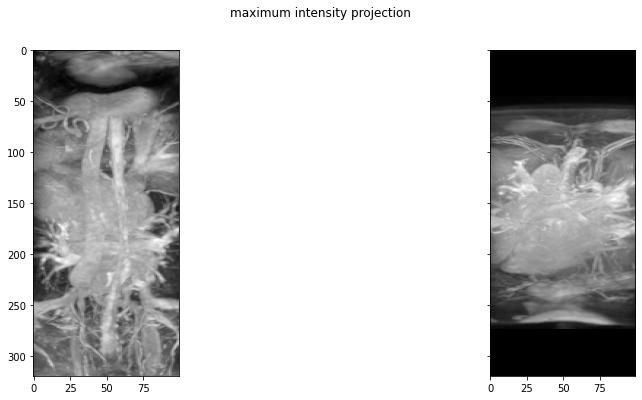

In [26]:
img_np = image_data
img_np.shape

mip01 = np.zeros((img_np.shape[1], img_np.shape[2]))
# SOLUTION (TODO)
for z in range (img_np.shape[0]):
    mip01 = np.maximum(mip01, img_np[z,:,:])
    
mip02 = np.zeros((img_np.shape[0], img_np.shape[2]))
# SOLUTION (TODO)
for z in range (img_np.shape[1]):
     mip02 = np.maximum(mip02, img_np[:,z,:])
        
mip03 = np.zeros((img_np.shape[0], img_np.shape[1]))
# SOLUTION (TODO)
for z in range (img_np.shape[2]):
     mip03 = np.maximum(mip03, img_np[:,:,z])
   
aspect_ratio = .7
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
axs[0].imshow(nd.rotate(mip01, 0), cmap="gray",aspect = aspect_ratio)
axs[1].imshow(nd.rotate(mip02, 0), cmap="gray",aspect = aspect_ratio)
#axs[2].imshow(nd.rotate(mip03, 90), cmap="gray")
fig.suptitle('maximum intensity projection')
plt.show()



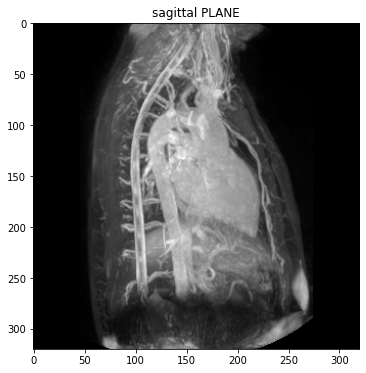

In [23]:
plt.figure(figsize=(10,6))
plt.title("sagittal PLANE")
plt.imshow(nd.rotate(mip03, 90), cmap="gray")

# Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [29]:
print(image.header_class)
print(label.header_class)
print(image.header)
print("=====================================================================================================================")
print(label.header)

<class 'nibabel.nifti1.Nifti1Header'>
<class 'nibabel.nifti1.Nifti1Header'>
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 320 320 100   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0

#  TASK: How many bits per pixel are used?


In [30]:

print(f"bits per pixel: {image.header['bitpix']}")

bits per pixel: 32


# # TASK: What are the units of measurement?

In [31]:
spatial_unit, temporal_unit = image.header.get_xyzt_units()

print(f"Spatial unit: {spatial_unit}, Temporal unit: {temporal_unit}")

Spatial unit: mm, Temporal unit: sec


# TASK: Do we have a regular grid? What are grid spacings?

In [33]:
print(f"Grid is regular with grid spacings Coronal-Axial-Sagittal : {image.header['pixdim']}")

Grid is regular with grid spacings Coronal-Axial-Sagittal : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]


# TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?


In [34]:
print(f"Sagittal: 2, Coronal: 0, Axial: 1 ")

Sagittal: 2, Coronal: 0, Axial: 1 


# Compute the volume (in mm³) of a spleen using one of the labels you've loaded. 


In [35]:
print(f'the volume (in mm³) of a spleen: {np.count_nonzero(label_data)}')

the volume (in mm³) of a spleen: 39164


# Plotting some charts

### Plot a histogram of all volumes that we have in our dataset and see how 
### our dataset measures against a slice of a normal population represented by the chart below.

(array([3., 0., 0., 3., 1., 0., 1., 2., 3., 0., 0., 0., 3., 0., 3., 0., 0.,
        0., 0., 1.]),
 array([32040. , 33845.4, 35650.8, 37456.2, 39261.6, 41067. , 42872.4,
        44677.8, 46483.2, 48288.6, 50094. , 51899.4, 53704.8, 55510.2,
        57315.6, 59121. , 60926.4, 62731.8, 64537.2, 66342.6, 68148. ]),
 <a list of 20 Patch objects>)

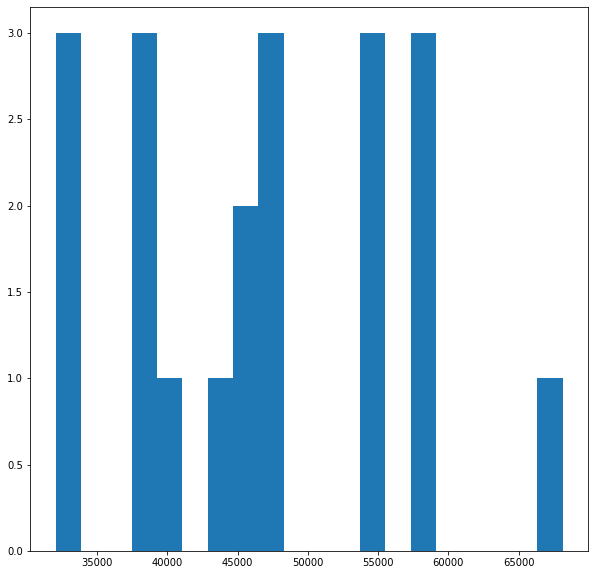

In [36]:
volumes = [np.count_nonzero(nib.load(l).get_fdata()) for l in labels]
plt.hist(volumes, bins=20)

# Is there any outlier ?

In [ ]:
print("one outlier above 500000")

one outlier above 500000


# Label files

In [ ]:
label_files = []
for lbl in labels:
    label = nib.load(lbl)
    label_data = label.get_fdata()
    volume = np.count_nonzero(label_data)
    if volume < 500000:
        label_files.append(os.path.basename(lbl))
                
print(len(label_files))

20


# TRAINING THE MODEL 

In [ ]:
!python training.py

# RUN THE INFERNECE ON THE MODEL

In [ ]:
!python inference.py

cuda
affine : [[   0.68359399    0.            0.         -349.31652832]
 [   0.            0.68359399    0.         -349.31652832]
 [   0.            0.            5.            0.        ]
 [   0.            0.            0.            1.        ]]


# CALCULATE THE PERFORMANCE OF THE MODEL

In [ ]:
!python evaluation.py

DSC: 0.493260987705606
Sensitivity: 0.32943273462500283


In [ ]:
!pip install pydicom

In [46]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import pydicom

In [47]:
img = nib.load("/content/Task02_Heart/imagesTr/la_003.nii.gz")

In [48]:
img_np = img.get_fdata()
img_np.shape

(320, 320, 130)

Text(0.5, 0.98, 'orthogonal projection')

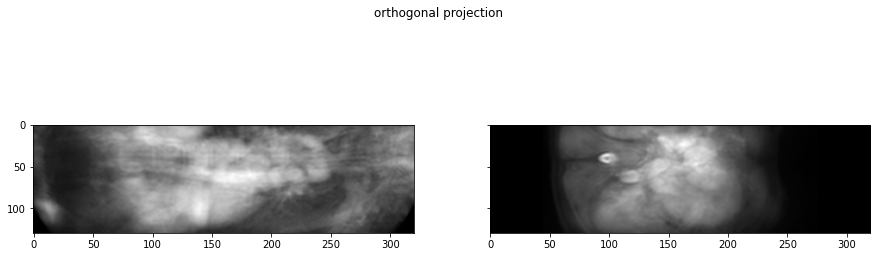

In [50]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as nd

img = img

img_np = img.get_fdata()
img_np.shape

vr01 = np.zeros((img_np.shape[1], img_np.shape[2]))
# SOLUTION (TODO)
for z in range (img_np.shape[0]):
    vr01 += img_np[z,:,:]
    
vr02 = np.zeros((img_np.shape[0], img_np.shape[2]))
# SOLUTION (TODO)
for z in range (img_np.shape[1]):
    vr02 += img_np[:,z,:]
vr03 = np.zeros((img_np.shape[0], img_np.shape[1]))
# SOLUTION (TODO)
for z in range (img_np.shape[2]):
    vr03 += img_np[:,:,z]
   
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
axs[0].imshow(nd.rotate(vr01, 90), cmap="gray" , aspect = aspect_ratio)
axs[1].imshow(nd.rotate(vr02, 90), cmap="gray",  aspect = aspect_ratio)
#axs[2].imshow(nd.rotate(vr03, 90), cmap="gray")
fig.suptitle('orthogonal projection')



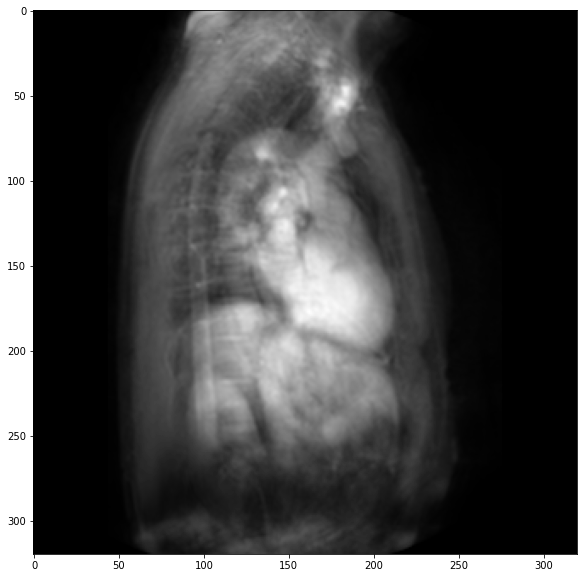

In [51]:
plt.imshow(nd.rotate(vr03, 90), cmap="gray")

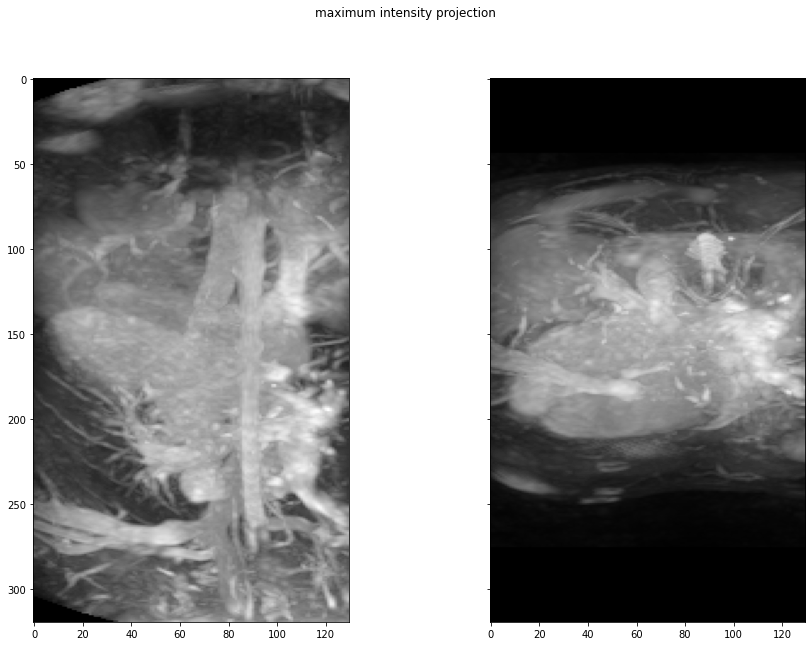

In [54]:
img_np = img.get_fdata()
img_np.shape

mip01 = np.zeros((img_np.shape[1], img_np.shape[2]))
# SOLUTION (TODO)
for z in range (img_np.shape[0]):
    mip01 = np.maximum(mip01, img_np[z,:,:])
    
mip02 = np.zeros((img_np.shape[0], img_np.shape[2]))
# SOLUTION (TODO)
for z in range (img_np.shape[1]):
     mip02 = np.maximum(mip02, img_np[:,z,:])
        
mip03 = np.zeros((img_np.shape[0], img_np.shape[1]))
# SOLUTION (TODO)
for z in range (img_np.shape[2]):
     mip03 = np.maximum(mip03, img_np[:,:,z])
   
aspect_ratio = .7
fig, axs = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
axs[0].imshow(nd.rotate(mip01, 0), cmap="gray",aspect = aspect_ratio)
axs[1].imshow(nd.rotate(mip02, 0), cmap="gray",aspect = aspect_ratio)
#axs[2].imshow(nd.rotate(mip03, 90), cmap="gray")
fig.suptitle('maximum intensity projection')
plt.show()



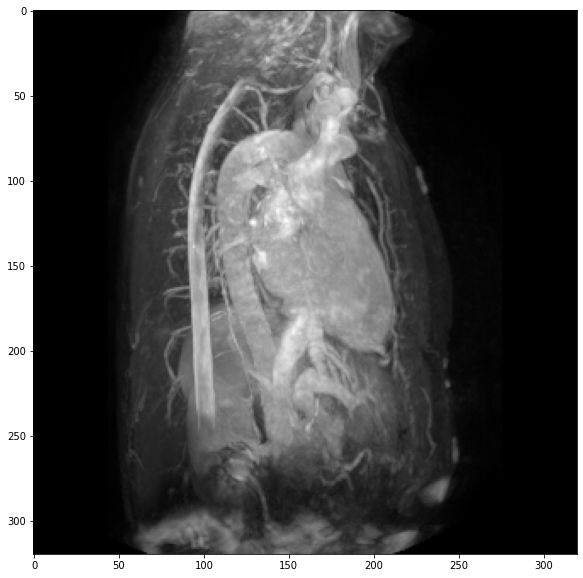

In [55]:
plt.imshow(nd.rotate(mip03, 90), cmap="gray")
fig.suptitle('maximum intensity projection')
plt.show()


In [ ]:
!pip install MedPy

# Creation of sub-volume 

No of classes present  in the label : [0. 1.]


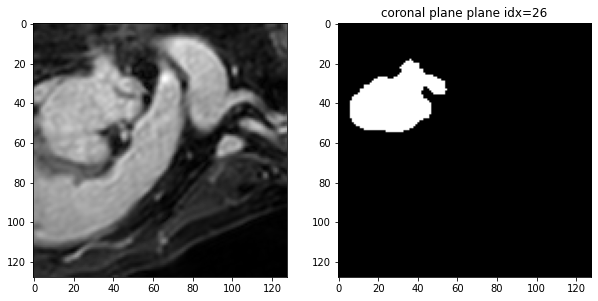

In [61]:
import json
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import keras



def get_sub_volume(image, label, 
                   orig_x = 512, orig_y = 512, orig_z = 90, 
                   output_x = 160, output_y = 160, output_z = 16,
                   num_classes = 4, max_tries = 1000, 
                   background_threshold=0.95):
    """
    Extract random sub-volume from original images.
    Args:
        image (np.array): original image, 
            of shape (orig_x, orig_y, orig_z, num_channels)
        label (np.array): original label. 
            labels coded using discrete values rather than
            a separate dimension, 
            so this is of shape (orig_x, orig_y, orig_z)
        orig_x (int): x_dim of input image
        orig_y (int): y_dim of input image
        orig_z (int): z_dim of input image
        output_x (int): desired x_dim of output
        output_y (int): desired y_dim of output
        output_z (int): desired z_dim of output
        num_classes (int): number of class labels
        max_tries (int): maximum trials to do when sampling
        background_threshold (float): limit on the fraction 
            of the sample which can be the background
    returns:
        X (np.array): sample of original image of dimension 
            (num_channels, output_x, output_y, output_z)
        y (np.array): labels which correspond to X, of dimension 
            (num_classes, output_x, output_y, output_z)
    """
    # Initialize features and labels with `None`
    X = None
    y = None

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    tries = 0
    print("No of classes present  in the label :" ,np.unique(label))
    while tries < max_tries:
        # randomly sample sub-volume by sampling the corner voxel
        # hint: make sure to leave enough room for the output dimensions!
        start_x = np.random.randint(0, orig_x - output_x + 1) 
        start_y = np.random.randint(0 ,orig_x - output_x + 1) 
        start_z = np.random.randint(0 ,orig_z - output_z + 1) 

        # extract relevant area of label
        y = label[start_x: start_x + output_x,
                  start_y: start_y + output_y,
                  start_z: start_z + output_z]
        
        # One-hot encode the categories.
        # This adds a 4th dimension, 'num_classes'
        # (output_x, output_y, output_z, num_classes)
        
        y = keras.utils.to_categorical(y, num_classes= num_classes)
      
        # compute the background ratio
        bgrd_ratio = np.sum(y[: , : , : , 0]) / (output_x * output_y * output_z)

        # increment tries counter
        tries += 1

        # if background ratio is below the desired threshold,
        # use that sub-volume.
        # otherwise continue the loop and try another random sub-volume
        if bgrd_ratio < background_threshold:

            # make copy of the sub-volume
            X = np.copy(image[start_x: start_x + output_x,
                              start_y: start_y + output_y,
                              start_z: start_z + output_z])
            
            # change dimension of X
            # from (x_dim, y_dim, z_dim, num_channels)
            # to (num_channels, x_dim, y_dim, z_dim)
            #X = np.moveaxis(X , 3 , 0)

            # change dimension of y
            # from (x_dim, y_dim, z_dim, num_classes)
            # to (num_classes, x_dim, y_dim, z_dim)
            y = np.moveaxis(y , 3 , 0)

            ### END CODE HERE ###
            
            # take a subset of y that excludes the background class
            # in the 'num_classes' dimension
            y = y[1:, :, :, :]
    
            return X, y

    # if we've tried max_tries number of samples
    # Give up in order to avoid looping forever.
    print(f"Tried {tries} times to find a sub-volume. Giving up...")
    
X, y = get_sub_volume(image_data, label_data, 
                   orig_x = 320, orig_y = 320, orig_z = image_data.shape[2], 
                   output_x = 128, output_y = 128, output_z = 80,
                   num_classes = 2, max_tries = 1000, 
                   background_threshold=0.99)
idx = 26
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(X[:,:,idx], cmap='gray')

plt.subplot(1,2,2)
plt.imshow(y[0,:,:,idx], cmap='gray')
plt.title(f"coronal plane plane idx={idx}")
plt.show()

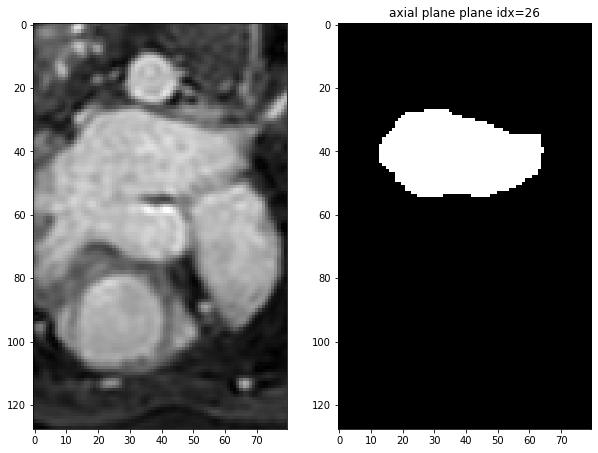

In [65]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(X[:,idx,:], cmap='gray')

plt.subplot(1,2,2)
plt.imshow(y[0,:,idx,:], cmap='gray')
plt.title(f"axial plane plane idx={idx}")
plt.show()

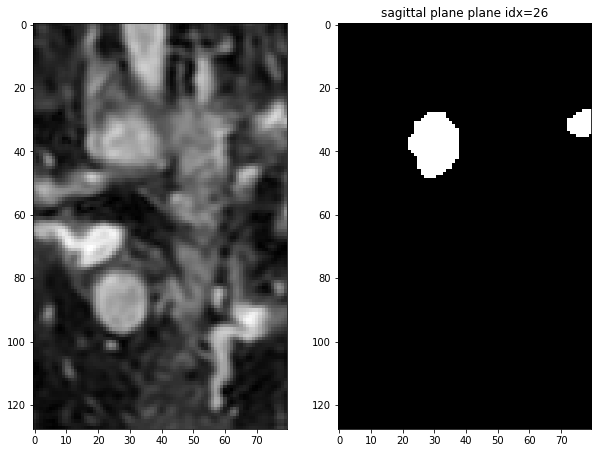

In [63]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(X[idx,:,:], cmap='gray')

plt.subplot(1,2,2)
plt.imshow(y[0,idx,:,:], cmap='gray')
plt.title(f"sagittal plane plane idx={idx}")
plt.show()

In [64]:
X.shape

(128, 128, 80)

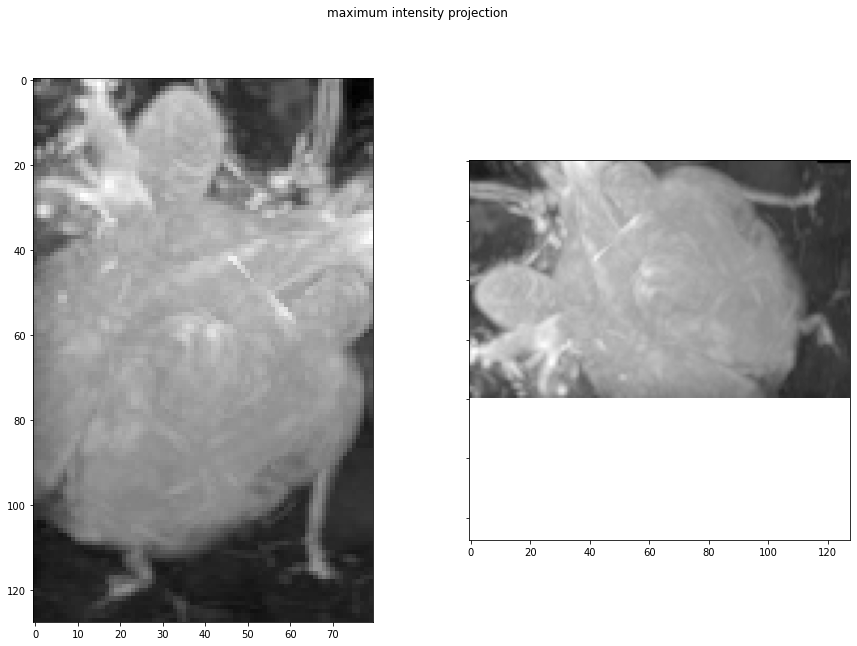

In [71]:
mip02 = np.zeros((X.shape[0], X.shape[2]))
# SOLUTION (TODO)
for z in range (89):
    
     mip02 = np.maximum(mip02, X[:,z,:])
        
aspect_ratio = .75
fig, axs = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

axs[1].imshow(nd.rotate(mip02, 90), cmap="gray")
axs[0].imshow(nd.rotate(mip02, 0), cmap="gray")
fig.suptitle('maximum intensity projection')
plt.show()


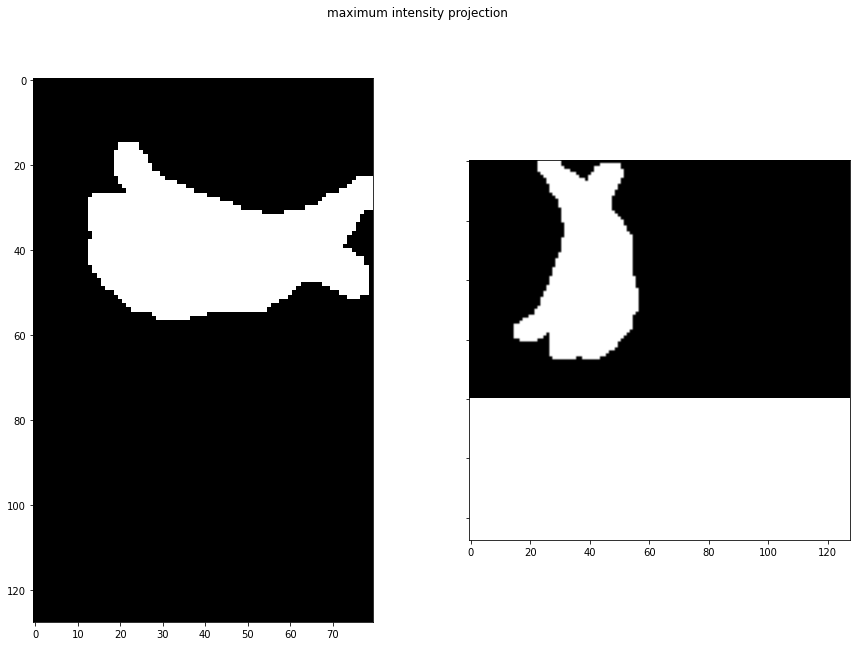

In [72]:
mip02 = np.zeros((y.shape[1], y.shape[3]))
# SOLUTION (TODO)
for z in range (89):
    
     mip02 = np.maximum(mip02, y[0,:,z,:])
        
aspect_ratio = 8
fig, axs = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

axs[1].imshow(nd.rotate(mip02, 90), cmap="gray")
axs[0].imshow(nd.rotate(mip02, 0), cmap="gray")
fig.suptitle('maximum intensity projection')
plt.show()


In [4]:
!pip install MedPy

     |████████████████████████████████| 153kB 17.4MB/s 
     |████████████████████████████████| 47.4MB 67kB/s 
  Created wheel for MedPy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754458 sha256=e5566cd2a105c9e6c556a828338e575a02da5b80a09762cdec1c9cb8be659545
  Stored in directory: /root/.cache/pip/wheels/8c/c9/9c/2c6281c7a72b9fb1570862a4f028af7ce38405008354fbf870
Successfully built MedPy


# Project RightAtrium3D udacity

In [24]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import os
import shutil

dirpath = "/content/runs"
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)
os.mkdir(dirpath)
%tensorboard --logdir runs
!python /content/Project/Model_training/src/run_ml_pipeline.py

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 764), started 0:23:45 ago. (Use '!kill 764' to kill it.)

<IPython.core.display.Javascript object>

2021-03-14 16:46:58.441760: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Loading data...
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shape (256, 256, 40)
(256, 256, 40)
(256, 256, 40)
image shap

In [19]:
d = {
  "volume_stats": [
    {
      "filename": "la_019.nii.gz",
      "dice": 0.8021844660194175,
      "jaccard": 0.6697061803444783
    },
    {
      "filename": "la_005.nii.gz",
      "dice": 0.8998737753200697,
      "jaccard": 0.8179732062853771
    }
  ],
  "overall": {
    "mean_dice": 0.8510291206697436,
    "mean_jaccard": 0.7438396933149276
  },
  "config": {
    "name": "Basic_unet",
    "root_dir": "/content/Project/Model_training/src/out/Task02_Heart",
    "n_epochs": 10,
    "learning_rate": 0.0002,
    "batch_size": 8,
    "patch_size": 256,
    "test_results_dir": "./runs"
  }
}

In [20]:
import pandas as pd 
df = pd.DataFrame(d['volume_stats'])

In [21]:
df

,filename,dice,jaccard
0,la_019.nii.gz,0.802184,0.669706
1,la_005.nii.gz,0.899874,0.817973


In [22]:
df = pd.DataFrame([d["config"]])

In [23]:
df

,name,root_dir,n_epochs,learning_rate,batch_size,patch_size,test_results_dir
0,Basic_unet,/content/Project/Model_training/src/out/Task02...,10,0.0002,8,256,./runs
